In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load data
X = np.load("data/ex7_X.npy")

print(X.shape)

(300, 2)


In [39]:
# Function to assign data points to the closets centroids
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        min_dist_idx (array_like): (m,) indecies of closest centroids
    
    """

    # Set K (number of centroids or clusters)
    K = centroids.shape[0]

    # Create an array of (m, K) shape to hold distances with the different centroids
    # Each column is the distance vector with that centroid. Each row belongs to one X element
    x_c_distances = np.zeros((X.shape[0], K))
    # Fill in distance values
    for c in range(K):
        x_c_distances[:,c] = np.linalg.norm(X - centroids[c], axis=1)
    # Get indicies of minimum distances
    min_dist_idx = np.argmin(x_c_distances, axis=1)
    
    return min_dist_idx

In [40]:
# Function to update centroids based on the mean of points assigned to each of them
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        new_centroids (ndarray): (K, n) New centroids computed
    """
    
    # m (example count) x n (feature count) of data
    m, n = X.shape
    
    # Holder array for the newly computed centroids
    new_centroids = np.zeros((K, n))
    
    # Set each new centroids to the mean of the points that belong to it
    for c in range(K):
        # Array of X values belonging to the c_th centroid
        X_c = X[np.where(idx == c)]
        # Mean of the points belonging to c_th centroid 
        new_centroids[c] = np.mean(X_c, axis=0)

    
    return new_centroids

In [41]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids  
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [42]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids


Shape of original_img is: (512, 512, 3)
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (262144,)
Closest centroid for the first five elements: [0 2 2 2 0]
(4, 3)


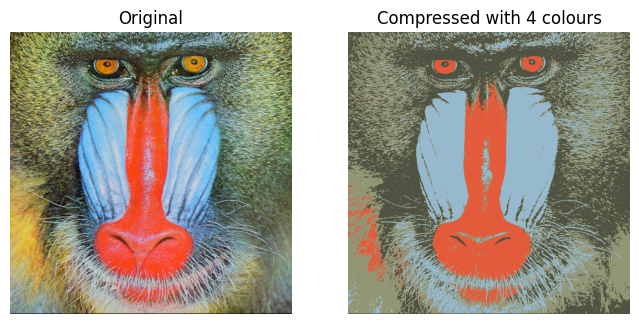

In [43]:
# Load an image
original_img = plt.imread('./baboon.png')

print("Shape of original_img is:", original_img.shape)

# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))


# Run the K-Means algorithm
K = 4                       
max_iters = 10               

# Initialize centroids
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 


print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])
print(centroids.shape)

# Represent image in terms of indices
# this usage of numpy (small_array[big_indecies_array]) gives an output equal in size to indecies array
# with values taken from the small_array
X_recovered = centroids[idx] 

# Reshape recovered image into proper dimensions
X_recovered = X_recovered.reshape(original_img.shape)

# Display images

# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()